In [50]:
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv('Electric_Production.csv')
print(data)


           DATE  IPG2211A2N  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0    01-01-1985     72.5052         NaN   88.847218         NaN         NaN   
1    02-01-1985     70.6720         NaN   88.847218         NaN         NaN   
2    03-01-1985     62.4502         NaN   88.847218         NaN         NaN   
3    04-01-1985     57.4714         NaN   88.847218         NaN         NaN   
4    05-01-1985     55.3151         NaN   88.847218         NaN         NaN   
5    06-01-1985     58.0904         NaN   88.847218         NaN         NaN   
6    07-01-1985     62.6202         NaN   88.847218         NaN         NaN   
7    08-01-1985     63.2485         NaN   88.847218         NaN         NaN   
8    09-01-1985     60.5846         NaN   88.847218         NaN         NaN   
9    10-01-1985     56.3154         NaN   88.847218         NaN         NaN   
10   11-01-1985     58.0005         NaN   88.847218         NaN         NaN   
11   12-01-1985     68.7145         NaN   88.847218 

In [52]:
Production_Rate=(data['IPG2211A2N'])
print(Production_Rate)

0       72.5052
1       70.6720
2       62.4502
3       57.4714
4       55.3151
5       58.0904
6       62.6202
7       63.2485
8       60.5846
9       56.3154
10      58.0005
11      68.7145
12      73.3057
13      67.9869
14      62.2221
15      57.0329
16      55.8137
17      59.9005
18      65.7655
19      64.4816
20      61.0005
21      57.5322
22      59.3417
23      68.1354
24      73.8152
25      70.0620
26      65.6100
27      60.1586
28      58.8734
29      63.8918
         ...   
367    110.5925
368    101.9204
369     91.5959
370     93.0628
371    103.2203
372    117.0837
373    106.6688
374     95.3548
375     89.3254
376     90.7369
377    104.0375
378    114.5397
379    115.5159
380    102.7637
381     91.4867
382     92.8900
383    112.7694
384    114.8505
385     99.4901
386    101.0396
387     88.3530
388     92.0805
389    102.1532
390    112.1538
391    108.9312
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048
Name: IPG2211A2N, Length

In [53]:
#moving average
pr_rate=list(Production_Rate)
print(pr_rate)
        


[72.5052, 70.672, 62.4502, 57.4714, 55.3151, 58.0904, 62.6202, 63.2485, 60.5846, 56.3154, 58.0005, 68.7145, 73.3057, 67.9869, 62.2221, 57.0329, 55.8137, 59.9005, 65.7655, 64.4816, 61.0005, 57.5322, 59.3417, 68.1354, 73.8152, 70.062, 65.61, 60.1586, 58.8734, 63.8918, 68.8694, 70.0669, 64.1151, 60.3789, 62.4643, 70.5777, 79.8703, 76.1622, 70.2928, 63.2384, 61.4065, 67.1097, 72.9816, 75.7655, 67.5152, 63.2832, 65.1078, 73.8631, 77.9188, 76.6822, 73.3523, 65.1081, 63.6892, 68.4722, 74.0301, 75.0448, 69.3053, 65.8735, 69.0706, 84.1949, 84.3598, 77.1726, 73.1964, 67.2781, 65.8218, 71.4654, 76.61399999999999, 77.1052, 73.061, 67.4365, 68.5665, 77.6839, 86.0214, 77.5573, 73.365, 67.15, 68.8162, 74.8448, 80.0928, 79.1606, 73.5743, 68.7538, 72.5166, 79.4894, 85.2855, 80.1643, 74.5275, 69.6441, 67.1784, 71.2078, 77.5081, 76.5374, 72.3541, 69.0286, 73.4992, 84.5159, 87.9464, 84.5561, 79.4747, 71.0578, 67.6762, 74.3297, 82.1048, 82.0605, 74.6031, 69.681, 74.4292, 84.2284, 94.1386, 87.1607, 79.2456,

In [54]:
from sklearn.metrics import mean_squared_error
import math
m = pr_rate
N = 5
cumsum, moving_aves = [0], []

for i, x in enumerate(m, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
print(moving_aves)


'''rmse=0
for i in cumsum:
    value=(pr_rate.[i]-moving_aves.[i+2])**2
    rmse=rmse+value
rmse=(rmse/cumsum)**0.5
print(rmse)'''

mse=mean_squared_error(moving_aves,m[:len(moving_aves)])
rmse=math.sqrt(mse/len(m))
print(rmse)


[63.68278, 60.79982, 59.18946000000001, 59.34911999999999, 59.971759999999996, 60.17181999999998, 60.15383999999998, 61.37269999999999, 63.38413999999999, 64.8646, 66.04594, 65.85242000000001, 63.27225999999998, 60.59121999999998, 60.14693999999997, 60.598839999999996, 61.39236000000001, 61.736060000000045, 61.62430000000004, 62.098280000000024, 63.96500000000001, 65.77729999999997, 67.39285999999993, 67.55623999999993, 65.70383999999994, 63.71915999999997, 63.480639999999994, 64.37202000000002, 65.16332000000003, 65.46442000000006, 65.17892000000006, 65.52058000000002, 67.48126000000002, 69.89068000000006, 71.87346000000007, 72.02828000000008, 70.19404000000013, 67.64192000000011, 67.0058000000001, 68.10034000000005, 68.95569999999998, 69.33103999999994, 68.9306599999999, 69.10695999999989, 69.53761999999988, 71.37101999999996, 73.38483999999998, 73.38490000000002, 71.35011999999998, 69.46080000000002, 68.93037999999997, 69.26888, 70.10832, 70.54518000000007, 70.66486000000005, 72.697

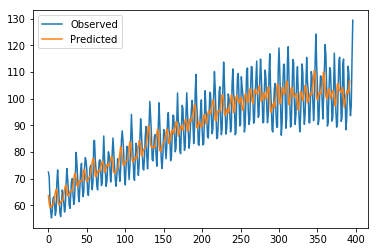

In [55]:
plt.plot(Production_Rate,label="Observed")
plt.plot(moving_aves,label="Predicted")
plt.legend()
plt.show()


In [56]:
m = pr_rate
N = 3
cumsum, moving_aves_3 = [0], []

for i, x in enumerate(m, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves_3.append(moving_ave)
print(moving_aves_3)

[68.54246666666667, 63.53119999999999, 58.41223333333334, 56.95896666666667, 58.675233333333345, 61.31969999999999, 62.151099999999985, 60.049499999999966, 58.300166666666634, 61.01013333333333, 66.67356666666667, 70.00236666666667, 67.83823333333332, 62.41396666666666, 58.35623333333331, 57.582366666666644, 60.493233333333286, 63.382533333333335, 63.74920000000005, 61.00476666666676, 59.291466666666715, 61.669766666666646, 67.09743333333329, 70.6708666666666, 69.8290666666666, 65.27686666666659, 61.54733333333328, 60.97460000000001, 63.87820000000003, 67.60936666666673, 67.68380000000002, 64.85363333333339, 62.319433333333414, 64.47363333333335, 70.97076666666665, 75.53673333333336, 75.44176666666681, 69.89780000000019, 64.97923333333347, 63.91820000000007, 67.16593333333337, 71.95226666666667, 72.0874333333333, 68.85463333333321, 65.30206666666648, 67.41803333333321, 72.29656666666658, 76.15470000000005, 75.98443333333337, 71.71420000000005, 67.38319999999992, 65.75649999999996, 68.7

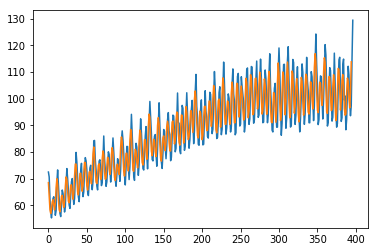

In [57]:
plt.plot(Production_Rate)
plt.plot(moving_aves_3)
plt.show()


In [58]:
m = pr_rate
N = 7
cumsum, moving_aves_7 = [0], []

for i, x in enumerate(m, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves_7.append(moving_ave)
print(moving_aves_7)

[62.73207142857143, 61.409685714285715, 59.96862857142857, 59.092228571428564, 59.16781428571427, 61.08201428571427, 63.255628571428566, 64.02229999999999, 63.875671428571415, 63.36828571428571, 63.29661428571428, 63.56804285714285, 63.14675714285712, 61.886171428571416, 60.88811428571429, 60.2181285714286, 60.54795714285716, 62.30820000000001, 64.29601428571429, 64.9098, 65.07099999999998, 64.95072857142853, 65.14232857142851, 65.79234285714281, 65.89719999999998, 65.36172857142856, 64.51217142857142, 63.76487142857146, 64.09425714285719, 65.76630000000003, 68.04894285714288, 69.09077142857147, 69.12304285714292, 68.9978000000001, 69.14460000000008, 69.80822857142864, 70.15164285714296, 69.56524285714295, 68.32995714285718, 67.32858571428571, 67.59564285714279, 69.37515714285708, 70.91931428571421, 71.44797142857136, 71.10322857142852, 70.7593571428571, 70.81735714285709, 71.29798571428572, 71.32184285714285, 70.91127142857145, 69.85742857142857, 68.78902857142859, 69.35510000000002, 

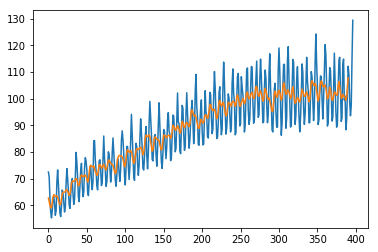

In [59]:
plt.plot(Production_Rate)
plt.plot(moving_aves_7)
plt.show()

In [60]:
m = pr_rate
N = 12
cumsum, moving_aves_12 = [0], []

for i, x in enumerate(m, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves_12.append(moving_ave)
print(moving_aves_12)

[62.16566666666666, 62.23237499999999, 62.00861666666666, 61.98960833333333, 61.953066666666665, 61.99461666666665, 62.145458333333316, 62.407566666666646, 62.51032499999999, 62.544983333333334, 62.64638333333335, 62.75815000000001, 62.709891666666664, 62.75235, 62.92527499999999, 63.207599999999985, 63.46807499999998, 63.72304999999998, 64.05565833333333, 64.31431666666667, 64.77975833333333, 65.03930833333332, 65.27653333333332, 65.53675, 65.740275, 66.24486666666667, 66.75321666666669, 67.14345000000004, 67.40010000000007, 67.61119166666674, 67.87935000000006, 68.2220333333334, 68.69691666666672, 68.98025833333338, 69.22228333333335, 69.44257499999999, 69.71635833333335, 69.55373333333334, 69.59706666666666, 69.85202499999998, 70.0078333333333, 70.19805833333328, 70.31159999999996, 70.39897499999995, 70.33891666666663, 70.48809166666665, 70.70395, 71.03418333333336, 71.89516666666668, 72.43191666666671, 72.47278333333338, 72.4597916666667, 72.64062500000007, 72.81834166666674, 73.06

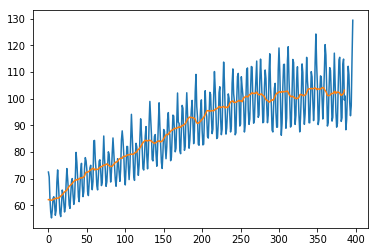

In [61]:
plt.plot(Production_Rate)
plt.plot(moving_aves_12)
plt.show()

In [62]:
#single exponential smoothing

#alpha=0.2
#F1=A1
#F(t+1)=0.2A(t)+(1-0.2)F(t)
forecast=[]
A1=pr_rate[0]
forecast.append(A1)
total_rows=len(pr_rate)
for i in range(1,total_rows):
    F=(0.2*pr_rate[i-1])+(0.8*forecast[i-1])
    forecast.append(F)

    
rmse=0
for i in range(total_rows):
    value=(pr_rate[i]-forecast[i])**2
    rmse=rmse+value
rmse=(rmse/total_rows)**0.5
print(rmse)

8.466403937163944


In [63]:
#alpha=0.4
#F1=A1
#F(t+1)=0.2A(t)+(1-0.2)F(t)
forecast=[]
A1=pr_rate[0]
forecast.append(A1)
total_rows=len(pr_rate)
for i in range(1,total_rows):
    F=(0.4*pr_rate[i-1])+(0.6*forecast[i-1])
    forecast.append(F)

print(forecast)    
rmse=0
for i in range(total_rows):
    value=(pr_rate[i]-forecast[i])**2
    rmse=rmse+value
rmse=(rmse/total_rows)**0.5
print(rmse)

[72.5052, 72.5052, 71.77192, 68.04323199999999, 63.8144992, 60.414739520000005, 59.48500371200001, 60.7390822272, 61.742849336320006, 61.279549601792006, 59.29388976107521, 58.77653385664512, 62.75172031398708, 66.97331218839224, 67.37874731303535, 65.31608838782121, 62.00281303269273, 59.527167819615634, 59.67650069176938, 62.112100415061626, 63.05990024903697, 62.236140149422184, 60.35456408965331, 59.94941845379199, 63.2238110722752, 67.46036664336512, 68.50101998601906, 67.34461199161143, 64.47020719496686, 62.231484316980115, 62.89561059018807, 65.28512635411285, 67.1978358124677, 65.96474148748061, 63.730404892488366, 63.22396293549302, 66.16545776129581, 71.6473946567775, 73.4533167940665, 72.1891100764399, 68.60882604586394, 65.72789562751836, 66.28061737651102, 68.96101042590661, 71.68280625554397, 70.01576375332638, 67.32273825199583, 66.4367629511975, 69.4072977707185, 72.8118986624311, 74.36001919745866, 73.95693151847519, 70.41739891108512, 67.72611934665107, 68.0245516079

In [64]:
#alpha=0.6
#F1=A1
#F(t+1)=0.2A(t)+(1-0.2)F(t)
forecast=[]
A1=pr_rate[0]
forecast.append(A1)
total_rows=len(pr_rate)
for i in range(1,total_rows):
    F=(0.6*pr_rate[i-1])+(0.4*forecast[i-1])
    forecast.append(F)

    
rmse=0
for i in range(total_rows):
    value=(pr_rate[i]-forecast[i])**2
    rmse=rmse+value
rmse=(rmse/total_rows)**0.5
print(rmse)

8.671535365685155


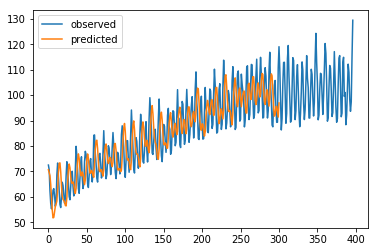

In [68]:
#double exponential smoothing


model=Holt(pr_rate)

model_fit=model.fit(smoothing_level=0.2,smoothing_slope=0.8, optimized = False)
y=model_fit.predict(0,300)
plt.plot(pr_rate,label="observed")
plt.plot(y,label="predicted")
plt.legend()
plt.show()


[72.5052     72.5052     71.77192    68.043232   63.8144992  60.41473952
 59.48500371 60.73908223 61.74284934 61.2795496  59.29388976 58.77653386
 62.75172031 66.97331219 67.37874731 65.31608839 62.00281303 59.52716782
 59.67650069 62.11210042 63.05990025 62.23614015 60.35456409 59.94941845
 63.22381107 67.46036664 68.50101999 67.34461199 64.47020719 62.23148432
 62.89561059 65.28512635 67.19783581 65.96474149 63.73040489 63.22396294
 66.16545776 71.64739466 73.45331679 72.18911008 68.60882605 65.72789563
 66.28061738 68.96101043 71.68280626 70.01576375 67.32273825 66.43676295
 69.40729777 72.81189866 74.3600192 ]


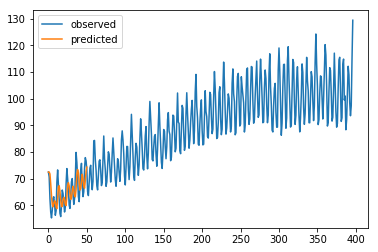

Root Mean square error 5.986610124729874


In [70]:
#triple exponential smoothing
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import math

from statsmodels.tsa.holtwinters import ExponentialSmoothing
# prepare data
r = pd.read_csv("Electric_Production.csv")
# create class
data=list(r['IPG2211A2N'])
model = ExponentialSmoothing(data)
model_fit = model.fit(smoothing_level=0.4,smoothing_slope=0.2,smoothing_seasonal=0.2,optimized=False)
# make prediction
y = model_fit.predict(0,50)
print(y)
plt.plot(data,label="observed")
plt.plot(y,label="predicted")
plt.legend()
plt.show()



def Rms(f_t):
    mae=0#mean absolute error
    mape=0#mean absolute percentage error
    mse=0#mean square error
    rmse=0#root mean square error
    for i in range(len(f_t)):
        mae=mae+(abs(data[i]-f_t[i]))
        mape=mape+(abs(data[i]-f_t[i]))/f_t[i]
        mse=mse+((abs(data[i]-f_t[i])**2))
    mae=mae/(len(f_t))
    mape=(mape/len(f_t))*100
    mse=mse/(len(f_t))
    rmse=math.sqrt(mse)
    print("Root Mean square error",rmse)
    
Rms(y)